# **Exploring and Preparing Data**


## Author: Reuben Dlamini

Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
!pip install numpy pandas seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [27]:
import requests
import io
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(url1)

# Convert response text to DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with missing values 
df.dropna(subset=["PayloadMass", "FlightNumber",'Class'], inplace=True)

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts) and `Payload` variables would affect the launch outcome.

A plot of <code>FlightNumber</code> vs. <code>PayloadMass</code> and overlayed with the outcome of the launch is shown below. With more flights (the flight number increases), the first stage is more likely to land successfully. Regarding the payload mass; it seems the more massive the payload, the less likely the first stage will return.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


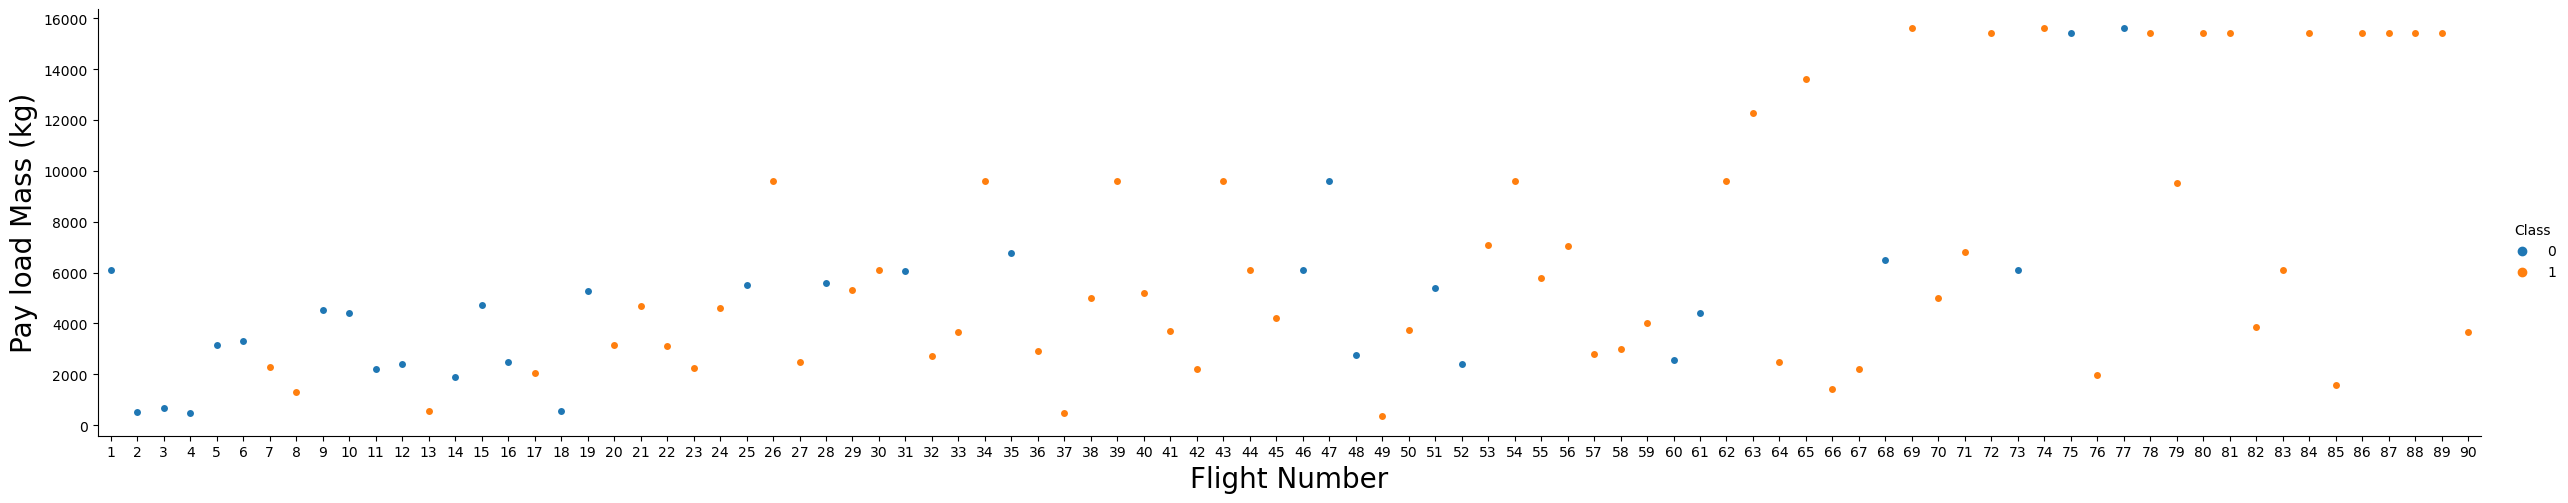

In [29]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### STEP 1: Visualize the relationship between Flight Number and Launch Site



Using the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, setting the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


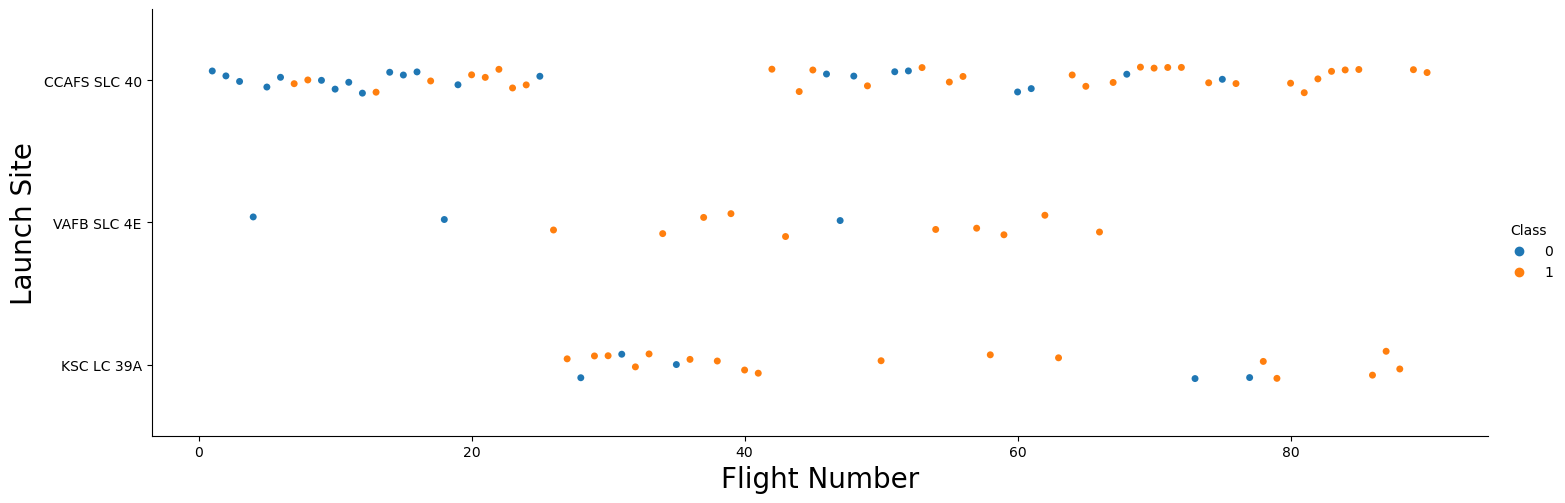

In [35]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### STEP 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


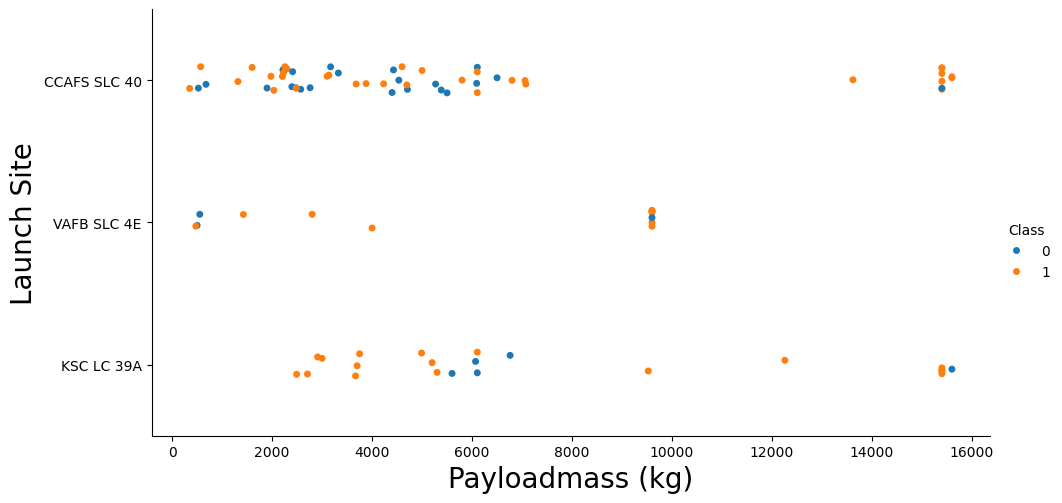

In [18]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, 
# and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 2)
plt.xlabel("Payloadmass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### STEP  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


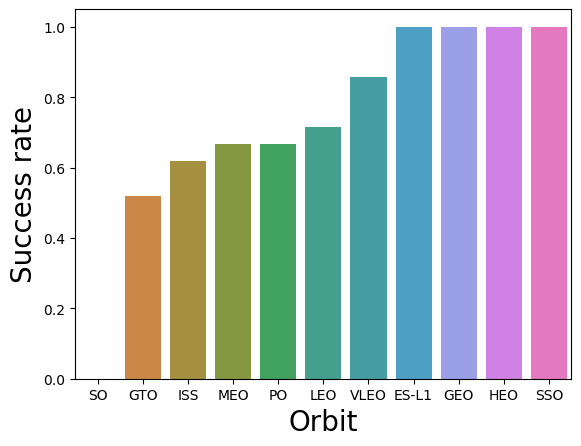

In [42]:
# HINT use groupby method on Orbit column and get the mean of Class column

df_orbit = df.groupby('Orbit', axis=0).mean(numeric_only=True)
df_orbit = df_orbit.sort_values(by=['Class'])

#df.sort_values(by=['Country'])

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
#print(type(df_can.groupby('Continent', axis=0)))

df_orbit.head()

sns.barplot(y="Class", x="Orbit", hue = 'Orbit', data=df_orbit)
#sns.barplot(y="Class", x="Orbit", hue="Class", data=df, aspect = 2)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()


Analysing the ploted bar chart try to find which orbits have high sucess rate.


### STEP  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


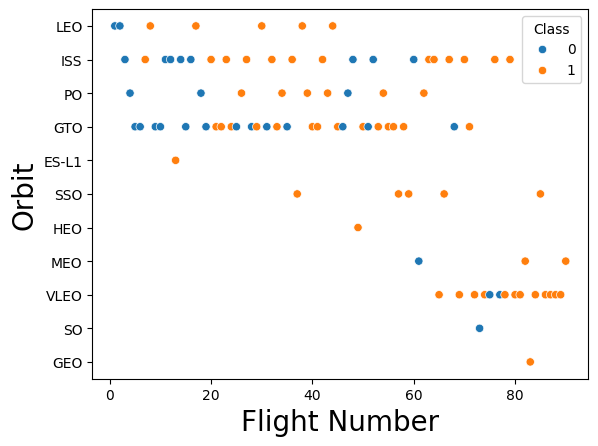

In [49]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(y="Orbit", x="FlightNumber", hue = 'Class', data=df)
#sns.barplot(y="Class", x="Orbit", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()



You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### STEP  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


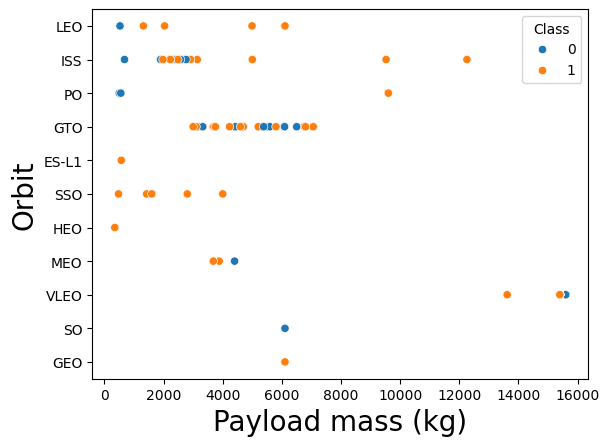

In [51]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(y="Orbit", x="PayloadMass", hue = 'Class', data=df)

plt.xlabel("Payload mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### STEP  6: Visualize the launch success yearly trend


Plotting a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The aim of this function is to get the year from the date:


In [52]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


   Date  FlightNumber   PayloadMass   Flights  GridFins    Reused      Legs  \
0  2010           1.0   6104.959412  1.000000  0.000000  0.000000  0.000000   
1  2012           2.0    525.000000  1.000000  0.000000  0.000000  0.000000   
2  2013           4.0   1449.000000  1.000000  0.000000  0.000000  0.000000   
3  2014           8.5   3019.333333  1.000000  0.000000  0.000000  0.333333   
4  2015          14.5   2346.833333  1.000000  0.833333  0.000000  0.833333   
5  2016          21.5   3639.125000  1.000000  1.000000  0.000000  1.000000   
6  2017          34.5   5365.719967  1.277778  0.833333  0.277778  0.777778   
7  2018          52.5   4832.767190  1.555556  0.833333  0.500000  0.833333   
8  2019          66.5   7551.370000  2.200000  0.900000  0.700000  0.900000   
9  2020          81.0  11477.522043  3.315789  0.947368  0.842105  0.947368   

      Block  ReusedCount  Longitude   Latitude     Class  
0  1.000000     0.000000 -80.577366  28.561857  0.000000  
1  1.000000 

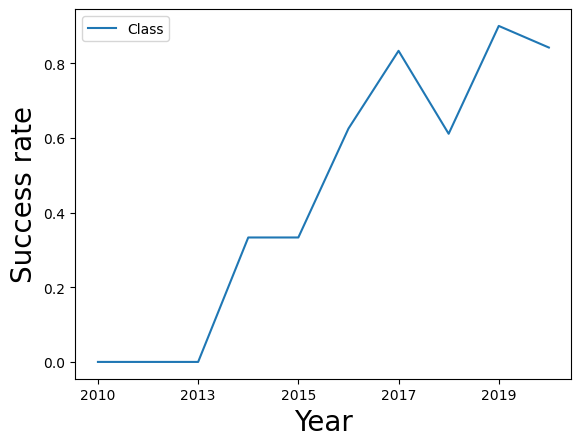

In [75]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

df_yr = df.groupby('Date', axis=0).mean(numeric_only=True).reset_index()
#df_yr = df_yr.sort_values(by=['Class'])

print(df_yr)

#sns.regplot(y="Class", x="Date",data=df_yr)

df_yr.plot(x='Date',y='Class',kind='line')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()

The sucess rate since 2013 kept increasing till 2020 can be observed.


## Features Engineering


Having obtained some preliminary insights about how each important variable would affect the success rate,  the features that will be used in success prediction in the future module can be selected.


In [50]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### STEP7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [52]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features,columns=['Orbit', 'LaunchSite', 'LandingPad','Serial'])

#pd.set_option('display.max_columns', None)
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### STEP  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [94]:
# HINT: use astype function

features_one_hot = features_one_hot.astype(float)
print(features_one_hot)
#df = df.astype(str)

    FlightNumber   PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0            1.0   6104.959412      1.0       0.0     0.0   0.0    1.0   
1            2.0    525.000000      1.0       0.0     0.0   0.0    1.0   
2            3.0    677.000000      1.0       0.0     0.0   0.0    1.0   
3            4.0    500.000000      1.0       0.0     0.0   0.0    1.0   
4            5.0   3170.000000      1.0       0.0     0.0   0.0    1.0   
..           ...           ...      ...       ...     ...   ...    ...   
85          86.0  15400.000000      2.0       1.0     1.0   1.0    5.0   
86          87.0  15400.000000      3.0       1.0     1.0   1.0    5.0   
87          88.0  15400.000000      6.0       1.0     1.0   1.0    5.0   
88          89.0  15400.000000      3.0       1.0     1.0   1.0    5.0   
89          90.0   3681.000000      1.0       1.0     0.0   1.0    5.0   

    ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0           0.0          0.0       

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>
